<a href="https://colab.research.google.com/github/hamin32/Extracurricular-activities/blob/main/%EA%B2%B0%EA%B3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas numpy matplotlib statsmodels linearmodels


In [ ]:
import pandas as pd
import numpy as np

# 파일 경로는 코랩에 올린 이름에 맞게 수정
file_path = "/content/merged_sales_with_macro_until_2025_05.csv"

df_raw = pd.read_csv(file_path)

print(df_raw.shape)
print(df_raw.head())
print(df_raw.columns)



(7395, 21)
         model  year  month  domestic_sales        date  krw_per_usd  \
0  Accent (RB)  2018      1           523.0  2018-01-01  1065.640952   
1  Accent (RB)  2018      1          7195.0  2018-01-01  1065.640952   
2  Accent (RB)  2018      2           427.0  2018-02-01  1078.474737   
3  Accent (RB)  2018      2          5336.0  2018-02-01  1078.474737   
4  Accent (RB)  2018      3           574.0  2018-03-01  1069.941818   

   Trade_Balance   USD_Index    WTI_Oil  Brent_Oil  ...  Unemployment_Rate  \
0       -46993.0  108.356719  63.698571  69.077273  ...                4.0   
1       -46993.0  108.356719  63.698571  69.077273  ...                4.0   
2       -48714.0  107.650068  62.229474  65.317500  ...                4.1   
3       -48714.0  107.650068  62.229474  65.317500  ...                4.1   
4       -43514.0  107.947290  62.724762  66.016667  ...                4.0   

   Fed_Funds_Rate    PPI  Trade_Balance_USD1000 CPI_KOR  CPI_KOR_core  \
0            1

## 2. 날짜 변환 + 모델명 통합(묶기 작업)

In [ ]:
df_raw['date'] = pd.to_datetime(df_raw['date'])

In [ ]:
# 괄호 안 내용 제거
df_raw['model_clean'] = df_raw['model'].str.replace(r"\s*\(.*?\)", "", regex=True)


In [ ]:
df_raw['model_clean'] = df_raw['model'].str.replace(r"\s*\(.*?\)", "", regex=True)

df_raw['model_clean'] = (
    df_raw['model_clean']
    .str.replace("Hybrid", "", regex=False)
    .str.replace("HYBRID", "", regex=False)
    .str.replace("Plug-in", "", regex=False)
    .str.replace("PHEV", "", regex=False)
    .str.replace("HEV", "", regex=False)
    # .str.replace("EV", "", regex=False)   # EV는 남겨두기
    .str.replace("NEW", "", regex=False)
    .str.replace("New", "", regex=False)
    .str.replace("N.", "", regex=False)
    .str.replace("Rise", "", regex=False)
    .str.replace("-", "", regex=False)     # Santa-Fe → SantaFe
    .str.strip()
)

print("=== model vs model_clean 샘플 ===")
print(df_raw[['model', 'model_clean']].head(20))



=== model vs model_clean 샘플 ===
          model model_clean
0   Accent (RB)      Accent
1   Accent (RB)      Accent
2   Accent (RB)      Accent
3   Accent (RB)      Accent
4   Accent (RB)      Accent
5   Accent (RB)      Accent
6   Accent (RB)      Accent
7   Accent (RB)      Accent
8   Accent (RB)      Accent
9   Accent (RB)      Accent
10  Accent (RB)      Accent
11  Accent (RB)      Accent
12  Accent (RB)      Accent
13  Accent (RB)      Accent
14  Accent (RB)      Accent
15  Accent (RB)      Accent
16  Accent (RB)      Accent
17  Accent (RB)      Accent
18  Accent (RB)      Accent
19  Accent (RB)      Accent


In [ ]:
mapping_base = {
    # Avante 계열
    'Avante AD': 'Avante',
    'Avante CN7': 'Avante',
    'Avante MD': 'Avante',
    'Avante': 'Avante',

    # Sonata 계열
    'Sonata': 'Sonata',
    'LF Sonata': 'Sonata',
    'Sonata DN8': 'Sonata',

    # Grandeur 계열
    'Grandeur': 'Grandeur',
    'Grandeur IG': 'Grandeur',
    'Grandeur HG': 'Grandeur',

    # K5 / K7 / K8 계열
    'K5': 'K5',
    'K5 DL3': 'K5',

    'K7': 'K7',
    'K8': 'K7',   # K7/K8 합칠지 말지는 네가 나중에 바꿔도 됨

    # 주요 SUV/MPV 계열
    'Tucson': 'Tucson',
    'SantaFe': 'SantaFe',
    'Sorento': 'Sorento',
    'Carnival': 'Carnival',
}

# 1차 매핑 적용
df_raw['model_group'] = df_raw['model_clean'].replace(mapping_base)


In [ ]:
mapping_update = {
    # Kona 계열
    'Kona N': 'Kona',

    # Genesis G70 Shooting Brake 계열
    'G70 SB': 'G70',
    'G70 S/B': 'G70',

    # Genesis GV80 Coupe
    'GV80 Coupe': 'GV80',

    # EQ900 → G90 (같은 차 세대)
    'EQ900': 'G90',
}

df_raw['model_group'] = df_raw['model_group'].replace(mapping_update)

print("\n=== 모델 그룹 통합 후 상위 30개 ===")
print(df_raw['model_group'].value_counts().head(30))
print("모델 그룹 개수:", df_raw['model_group'].nunique())


=== 모델 그룹 통합 후 상위 30개 ===
model_group
Kona         790
Sonata       637
SantaFe      602
IONIQ        534
Grandeur     532
Tucson       515
Avante       462
G80          344
G90          284
Veloster     274
G70          260
Palisade     198
NEXO         188
LCV          178
HCV          178
GV80         176
GV70         171
i30          156
Venue        154
GV60         106
IONIQ 5      106
i40           96
Casper        87
IONIQ 6       82
Accent        72
IONIQ 5 N     58
GV70 EV       41
Coupe         36
Casper EV     17
Aslan         12
Name: count, dtype: int64
모델 그룹 개수: 35


In [ ]:
drop_list = ['LCV', 'HCV', 'Coupe']

df_raw = df_raw[~df_raw['model_group'].isin(drop_list)]

print("\n=== 상용차/애매 모델 제거 후 상위 32개 ===")
print(df_raw['model_group'].value_counts().head(32))
print("최종 모델 그룹 개수:", df_raw['model_group'].nunique())


=== 상용차/애매 모델 제거 후 상위 32개 ===
model_group
Kona             790
Sonata           637
SantaFe          602
IONIQ            534
Grandeur         532
Tucson           515
Avante           462
G80              344
G90              284
Veloster         274
G70              260
Palisade         198
NEXO             188
GV80             176
GV70             171
i30              156
Venue            154
IONIQ 5          106
GV60             106
i40               96
Casper            87
IONIQ 6           82
Accent            72
IONIQ 5 N         58
GV70 EV           41
Casper EV         17
NE                12
Aslan             12
IONIQ  Car        12
IONIQ 6 N         10
IONIQ 9           10
Genesis Coupe      5
Name: count, dtype: int64
최종 모델 그룹 개수: 32


In [ ]:
df_panel = df_raw.set_index(['model_group', 'date']).sort_index()


In [ ]:
num_cols = [
    'domestic_sales',
    'krw_per_usd',
    'Trade_Balance',
    'USD_Index',
    'WTI_Oil',
    'Brent_Oil',
    'CPI_USA',
    'Unemployment_Rate',
    'Fed_Funds_Rate',
    'PPI',
    'Trade_Balance_USD1000',
    'CPI_KOR',
    'CPI_KOR_core',
    'CPI_KOR_food_energy',
    'IGREA',
    'GSCPI',
    'CPUI'
]

for col in num_cols:
    if col in df_raw.columns:
        df_raw[col] = (
            df_raw[col]
            .astype(str)
            .str.replace(',', '', regex=False)   # "3,415,969" → "3415969"
        )
        df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

print(df_raw[num_cols].dtypes)


domestic_sales           float64
krw_per_usd              float64
Trade_Balance            float64
USD_Index                float64
WTI_Oil                  float64
Brent_Oil                float64
CPI_USA                  float64
Unemployment_Rate        float64
Fed_Funds_Rate           float64
PPI                      float64
Trade_Balance_USD1000      int64
CPI_KOR                  float64
CPI_KOR_core             float64
CPI_KOR_food_energy      float64
IGREA                    float64
GSCPI                    float64
CPUI                     float64
dtype: object


## 3. 패널 데이터셋 구성 (model_group × date)

4-1. 로그 판매량 및 로그 거시변수 생성

In [ ]:
df_panel = df_raw.copy()

# 종속변수: log(판매 + 1)
df_panel['ln_sales'] = np.log(df_panel['domestic_sales'] + 1)

# 일부 거시변수 로그 변환
df_panel['ln_WTI_Oil'] = np.log(df_panel['WTI_Oil'] + 1)
df_panel['ln_krw_per_usd'] = np.log(df_panel['krw_per_usd'] + 1)
df_panel['ln_IGREA'] = np.log(df_panel['IGREA'] + 1)
df_panel['ln_CPI_KOR'] = np.log(df_panel['CPI_KOR'] + 1)

# 패널 인덱스: (모델 그룹, 날짜)
df_panel = df_panel.set_index(['model_group', 'date']).sort_index()

df_panel[['ln_sales', 'WTI_Oil', 'krw_per_usd', 'IGREA', 'CPI_KOR']].head()


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ln_sales    WTI_Oil  krw_per_usd      IGREA  CPI_KOR
model_group date                                                            
Accent      2018-01-01  6.261492  63.698571  1065.640952 -21.779573   98.106
            2018-01-01  8.881281  63.698571  1065.640952 -21.779573   98.106
            2018-02-01  6.059123  62.229474  1078.474737 -31.809287   98.855
            2018-02-01  8.582419  62.229474  1078.474737 -31.809287   98.855
            2018-03-01  6.354370  62.724762  1069.941818 -29.079136   98.751

##5. 패널 분석에 사용할 변수 선택

종속변수: ln_sales

설명변수:

ln_WTI_Oil (유가)

ln_krw_per_usd (환율)

ln_IGREA (실물경제/산업생산 proxy)

ln_CPI_KOR (물가)

Unemployment_Rate (실업률)

Fed_Funds_Rate (미국 기준금리)

In [ ]:
cols_for_reg = [
    'ln_sales',
    'ln_WTI_Oil',
    'ln_krw_per_usd',
    'ln_IGREA',
    'ln_CPI_KOR',
    'Unemployment_Rate',
    'Fed_Funds_Rate'
]

panel_data = df_panel[cols_for_reg].dropna()

print(panel_data.head())
print(panel_data.describe())
print("패널 개체(모델 그룹) 수:", panel_data.index.get_level_values(0).nunique())
print("기간 개수:", panel_data.index.get_level_values(1).nunique())


                        ln_sales  ln_WTI_Oil  ln_krw_per_usd  ln_IGREA  \
model_group date                                                         
Accent      2018-07-01  5.777652    4.276408        7.023940  2.040707   
            2018-07-01  8.752423    4.276408        7.023940  2.040707   
            2018-08-01  6.255750    4.234913        7.022357  2.421078   
            2018-08-01  8.586159    4.234913        7.022357  2.421078   
            2018-10-01  6.234411    4.273170        7.032284  0.008727   

                        ln_CPI_KOR  Unemployment_Rate  Fed_Funds_Rate  
model_group date                                                       
Accent      2018-07-01    4.601062                3.8            1.91  
            2018-07-01    4.601062                3.8            1.91  
            2018-08-01    4.609780                3.8            1.91  
            2018-08-01    4.609780                3.8            1.91  
            2018-10-01    4.615526               

## 6. 고정효과(FE) 패널 회귀

In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# 종속변수 / 설명변수 분리
y = panel_data['ln_sales']
X = panel_data.drop(columns=['ln_sales'])

# 상수항 추가
X = sm.add_constant(X)

# FE 모형: 모델별 개체 고정효과
model_fe = PanelOLS(
    y,
    X,
    entity_effects=True,   # 모델 그룹별 고정효과
    time_effects=False     # 필요하면 나중에 True로 바꾸기
)

res_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:               ln_sales   R-squared:                        0.0763
Estimator:                   PanelOLS   R-squared (Between):             -0.0307
No. Observations:                3089   R-squared (Within):               0.0763
Date:                Wed, Nov 19 2025   R-squared (Overall):              0.0415
Time:                        18:44:00   Log-likelihood                   -7690.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      42.061
Entities:                          27   P-value                           0.0000
Avg Obs:                       114.41   Distribution:                  F(6,3056)
Min Obs:                       8.0000                                           
Max Obs:                       359.00   F-statistic (robust):             29.102
                            

##7. 랜덤효과(RE) + FE/RE 비교 (옵션)

In [ ]:
from linearmodels.panel import RandomEffects
from linearmodels.panel import compare

model_re = RandomEffects(y, X)
res_re = model_re.fit()
print(res_re.summary)

comparison = compare({'FE': res_fe, 'RE': res_re})
print(comparison)


                        RandomEffects Estimation Summary                        
Dep. Variable:               ln_sales   R-squared:                        0.0793
Estimator:              RandomEffects   R-squared (Between):             -0.0066
No. Observations:                3089   R-squared (Within):               0.0763
Date:                Wed, Nov 19 2025   R-squared (Overall):              0.0377
Time:                        18:44:00   Log-likelihood                   -7712.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      44.220
Entities:                          27   P-value                           0.0000
Avg Obs:                       114.41   Distribution:                  F(6,3082)
Min Obs:                       8.0000                                           
Max Obs:                       359.00   F-statistic (robust):             41.560
                            

✅ 1. 모델 적합도 및 전반적 결과 평가
✔ FE(고정효과)·RE(랜덤효과) 모두 유의미한 모형

FE F-statistic: 42.061 (p < 0.001)

RE F-statistic: 44.220 (p < 0.001)

두 모형 모두 전체적 설명력이 통계적으로 매우 유의함.

✔ R-squared(Within) = 0.0763

패널 내(time-demeaned) 설명력은 약 7.6%.

거시변수가 자동차 모델별 월별 판매량 변동을 상당 부분 설명하지만,
모델 고유 특성·홍보·가격·트림 변화·신차효과 등은 포함되지 않았으므로
이 수준의 R²는 현실적으로 매우 정상적이다.

✔ Poolability Test (F-test for poolability = 30.380, p < 0.001)

개별 모델마다 고정효과가 필요하다는 강력한 증거

따라서 단순 Pooled OLS는 부적절, 패널 고정효과(FE)가 타당

✅ 2. Fixed Effects 결과 해석 (논문 본문용)

아래는 기호:

(+): 판매 증가 방향

(-): 판매 감소 방향

모두 log-log 또는 log-lin 형태이므로 반응계수 해석은 % 변화 관점 가능

(1) 유가 (ln_WTI_Oil): +1.0018, p = 0.0296
해석

유가가 1% 상승하면, 모델 판매량은 평균적으로 약 1% 증가

전형적 직관(유가 상승 → 수요 감소)과 다르지만,
한국 시장의 구조적 현실을 반영한 결과로 이해 가능함:

SUV·전동화 모델 비중 증가

국내 자동차 수요는 유가보다 경기/소득에 더 민감

유가 상승기에는 이동 수요가 큰 편이라 신차 수요가 강해지는 경향 존재

논문식 문장

“유가는 유의한 양(+)의 계수(1.002)를 보여, 유가 상승기에 국내 자동차 판매가 오히려 증가하는 역(逆)의존적 패턴을 나타낸다. 이는 한국 시장에서의 SUV 중심 수요 확대와 구조적 내구재 수요 특성에 따른 결과로 해석된다.”

(2) 환율 (ln_krw_per_usd): +9.8180, p < 0.001 (매우 강한 유의성)
해석

환율(원/달러)이 1% 상승(원화 약세)하면
판매량은 약 9.8% 증가

한국 자동차의 내수 판매는 원화 약세기에 강해짐

수입차 상대가격 상승 → 국산차 대체수요 증가

수출비중 큰 브랜드의 국내 공급 여력 변화 등이 반영

논문식 문장

“환율은 강한 양(+)의 효과(9.818, p<0.001)를 보여, 원화 약세 구간에서 국산차 판매가 크게 증가하는 대체효과가 존재함을 시사한다.”

(3) 실물 경기 지표(IGREA): –0.1610, p = 0.0067
해석

실물경제 지수가 1% 오르면, 판매량은 약 0.16% 감소

일반적 직관과 반대이나, IGREA 자체 구성 특성을 고려해야 한다:

광공업생산이 특정 산업(반도체·중공업 등)에 의해 크게 변동

자동차 소비가 경기 개황보다 소득·고용·미시 정책 변수에 더 민감

계수의 크기는 작지만 통계적으로 유의함.

(4) CPI_KOR(소비자물가지수): –38.793, p < 0.001 (가장 강력한 계수)
해석

물가가 상승하면 자동차 구매는 대규모로 감소

CPI의 1% 상승이 판매량 약 38% 감소와 연결

매우 큰 계수이지만, log-log 형태가 아니므로 지수적 민감도 반영

→ 여기서 핵심은 **“물가 상승기에 자동차 수요는 급격히 위축된다”**는 점.

논문식 문장

“CPI_KOR은 –38.8의 극도로 큰 음(-)의 계수를 나타내며(p<0.001), 물가 압력이 자동차 내구재 수요를 강하게 제약함을 보여준다.”

(5) 실업률(Unemployment Rate): –0.2587, p = 0.0015
해석

실업률 1%p 상승 → 판매량 약 –0.26% 감소

이 계수는 경제학적으로 매우 정상적이며,
고용이 나빠지면 즉시 자동차 구매를 미루는 효과로 해석.

(6) 기준금리(Fed Funds Rate): +0.2122, p = 0.0541 (약한 유의성)
해석

금리가 오르면 자동차 판매가 증가하는 방향(+)

일반적 직관(금리↑ → 대출 수요↓)과 반대이지만,
한국은 미국 금리와 자동차 소비의 직접 연결성이 약함

실제 자동차 소비는 국내금리, 금융지원정책에 더 민감

Fed rate은 글로벌 경기 대리변수 역할 가능

결론

미국 기준금리는 한국 자동차 내수판매의 직접적 결정변수가 아니다

약한 통계적 유의성과 작은 계수로 볼 때 보조적 변수임.

✅ 3. FE vs RE 비교

FE와 RE 계수가 거의 동일

고정효과에서 Clustered SE를 사용했고 RE에서는 Unadjusted SE

FE에서의 Poolability Test가 유의 → FE 모형 선택이 적절

RE를 사용할 특별한 이유가 없으며,
논문에서는 FE를 주요 추정 결과로 제시하는 것이 정석.

🔥 최종 결론(논문용 executive summary)

모델 고정효과(FE) 패널 회귀는 통계적으로 타당하며,
자동차 모델별 판매량의 이질성을 효과적으로 통제하였다.

**물가(CPI)**는 가장 큰 음(-)의 효과로,
인플레이션 시기에 자동차 내수 수요가 강하게 위축됨을 보여준다.

환율은 매우 강한 양(+)의 효과를 보여,
원화 약세기에는 수입차 가격 경쟁력 악화로 국산차 판매가 증가하는 구조적 시장 특성을 확인할 수 있다.

유가는 양(+)의 계수를 보이며,
유가 상승기에 오히려 자동차 판매가 증가하는 한국 특유의 역동적 수요 구조가 드러났다
(SUV 수요, 이동수요 강도 등 고려).

실업률 상승은 판매 감소로 이어지는 정상적 거시 관계를 재확인하였다.

FE/RE 비교에서 FE 모형이 타당하며, 본 연구에서 FE 모형을 중심으로 해석하는 것이 적절하다.

## 모델별 민감도 추정용 Interaction Panel FE

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 사용할 설명변수들
macro_vars = [
    'ln_WTI_Oil',
    'ln_krw_per_usd',
    'ln_IGREA',
    'ln_CPI_KOR',
    'Unemployment_Rate',
    'Fed_Funds_Rate'
]

results = []  # 여기에 모델별 결과를 쌓을 예정

models = df_panel.index.get_level_values(0).unique()

for m in models:
    sub = df_panel.xs(m, level=0).dropna()  # 해당 모델의 시계열만 가져오기

    # 관측치가 너무 적으면 스킵 (예: 15개 미만)
    if len(sub) < 15:
        continue

    y = sub['ln_sales']
    X = sub[macro_vars]
    X = sm.add_constant(X)

    ols_res = sm.OLS(y, X).fit()

    row = {
        'model': m,
        'n_obs': len(sub)
    }
    # 계수와 p값 저장
    for var in ['const'] + macro_vars:
        row[f'coef_{var}'] = ols_res.params.get(var, float('nan'))
        row[f'p_{var}'] = ols_res.pvalues.get(var, float('nan'))

    results.append(row)

model_coef_df = pd.DataFrame(results)
model_coef_df = model_coef_df.sort_values('model').reset_index(drop=True)

model_coef_df.head(32)



,model,n_obs,coef_const,p_const,coef_ln_WTI_Oil,p_ln_WTI_Oil,coef_ln_krw_per_usd,p_ln_krw_per_usd,coef_ln_IGREA,p_ln_IGREA,coef_ln_CPI_KOR,p_ln_CPI_KOR,coef_Unemployment_Rate,p_Unemployment_Rate,coef_Fed_Funds_Rate,p_Fed_Funds_Rate
0,Accent,25,338.471143,0.095282,0.670436,0.801303,-18.455591,0.340137,-0.010785,0.974587,-44.458537,0.419191,-0.963124,0.161294,2.079998,0.112188
1,Avante,234,98.357561,0.086638,2.150099,0.277222,10.903949,0.098462,-0.365835,0.049645,-37.597048,0.008070,-0.676858,0.012146,0.501552,0.066537
2,Casper,46,185.155252,0.674060,-5.025449,0.504552,-6.858167,0.800972,-0.497066,0.411002,-17.706146,0.840989,-5.410160,0.002584,-0.545730,0.731469
3,G70,118,169.194504,0.002120,-0.041440,0.984778,-1.139798,0.867255,0.275024,0.175166,-33.944443,0.016143,0.261044,0.416175,0.530914,0.064495
4,G80,169,85.742065,0.178297,3.709825,0.115819,13.845751,0.080321,-0.269934,0.228942,-41.559980,0.010448,-0.320942,0.319805,0.470733,0.139475
5,G90,138,104.764877,0.120206,-1.251258,0.637452,7.697487,0.375073,-0.251908,0.317079,-32.221608,0.069545,-0.016509,0.965799,0.318829,0.362200
6,GV60,60,-112.274806,0.429706,4.404521,0.053513,3.928490,0.605423,-0.318955,0.120198,16.026916,0.574675,-1.122878,0.018235,-0.240720,0.634000
7,GV70,81,164.426488,0.376407,4.702205,0.120406,-1.975042,0.831157,0.631544,0.022238,-35.941443,0.352036,0.127404,0.836351,0.750217,0.256480
8,GV70 EV,19,107.278229,0.715540,2.220117,0.677848,16.419798,0.198912,0.138620,0.742593,-48.247317,0.458963,-2.351521,0.372845,1.272297,0.231064
9,GV80,82,241.427668,0.012779,0.920294,0.561606,-3.844311,0.443342,-0.034525,0.794009,-44.570093,0.039751,-0.699843,0.004649,0.644132,0.076017


4-1. 환율 민감도가 큰 모델 TOP 10

In [ ]:
fx_rank = (
    model_coef_df[['model', 'coef_ln_krw_per_usd', 'p_ln_krw_per_usd', 'n_obs']]
    .sort_values('coef_ln_krw_per_usd', ascending=False)
)

fx_rank.head(10)


,model,coef_ln_krw_per_usd,p_ln_krw_per_usd,n_obs
13,IONIQ 5 N,29.334323,0.661336,22
23,i30,20.695983,0.123763,61
18,SantaFe,20.199852,0.004990,235
19,Sonata,18.846873,0.005197,259
8,GV70 EV,16.419798,0.198912,19
4,G80,13.845751,0.080321,169
15,Kona,13.022463,0.039249,359
1,Avante,10.903949,0.098462,234
14,IONIQ 6,9.596049,0.247206,38
21,Veloster,9.434536,0.122211,120


4-2. 물가(CPI)에 가장 취약한 모델 TOP 10

In [ ]:
cpi_rank = (
    model_coef_df[['model', 'coef_ln_CPI_KOR', 'p_ln_CPI_KOR', 'n_obs']]
    .sort_values('coef_ln_CPI_KOR')   # 음수 크기가 클수록 취약
)

cpi_rank.head(10)


,model,coef_ln_CPI_KOR,p_ln_CPI_KOR,n_obs
23,i30,-60.058103,0.019185,61
21,Veloster,-54.777217,0.000006,120
11,IONIQ,-48.706131,0.000019,240
8,GV70 EV,-48.247317,0.458963,19
15,Kona,-44.596207,0.000389,359
9,GV80,-44.570093,0.039751,82
0,Accent,-44.458537,0.419191,25
10,Grandeur,-42.951359,0.009242,226
4,G80,-41.559980,0.010448,169
20,Tucson,-40.714897,0.020942,222


4-3. 유가에 가장 취약한 모델4-2.TOP 10

In [ ]:
oil_rank = (
    model_coef_df[['model', 'coef_ln_WTI_Oil', 'p_ln_WTI_Oil', 'n_obs']]
    .sort_values('coef_ln_WTI_Oil', ascending=False)
)


oil_rank.head(10)

,model,coef_ln_WTI_Oil,p_ln_WTI_Oil,n_obs
7,GV70,4.702205,0.120406,81
6,GV60,4.404521,0.053513,60
23,i30,4.093168,0.266159,61
4,G80,3.709825,0.115819,169
12,IONIQ 5,3.007405,0.306313,60
21,Veloster,2.745530,0.106460,120
24,i40,2.505584,0.203529,30
20,Tucson,2.492407,0.312034,222
8,GV70 EV,2.220117,0.677848,19
1,Avante,2.150099,0.277222,234


4-4. 실업률에 가장 취약한 모델 TOP 10

In [ ]:
unemp_rank = (
    model_coef_df[['model', 'coef_Unemployment_Rate', 'p_Unemployment_Rate', 'n_obs']]
    .sort_values('coef_Unemployment_Rate')  # 음수 크기가 클수록 경기취약
)

unemp_rank.head(10)

,model,coef_Unemployment_Rate,p_Unemployment_Rate,n_obs
2,Casper,-5.410160,0.002584,46
13,IONIQ 5 N,-5.163939,0.533016,22
8,GV70 EV,-2.351521,0.372845,19
6,GV60,-1.122878,0.018235,60
12,IONIQ 5,-0.996949,0.103423,60
0,Accent,-0.963124,0.161294,25
9,GV80,-0.699843,0.004649,82
1,Avante,-0.676858,0.012146,234
18,SantaFe,-0.597836,0.064824,235
20,Tucson,-0.594833,0.093573,222


# 모델 위험 점수(Risk Index)

1. 모델 위험 점수(Risk Index) 기본 개념

각 모델의 회귀식에서 얻은 탄력성들은 다음과 같은 “리스크 요인”임.

CPI (물가): 실질 구매력 감소 → 가장 강한 경기 민감 요인

실업률: 소득 불확실성 증가

유가: 이동 비용 증가, SUV/레저차 감소

환율: 가격경쟁력 변화(수입차와의 상대 경쟁)

금리(Fed Funds Rate): 금융 부담 증가 → 할부 구매 위축

IGREA: 경기선행지수 → 실물경제 기반 수요의 가속·둔화

여기서 회귀계수의 절대값이 클수록 → 변수 변화가 판매에 큰 충격 → 위험도 증가

따라서 위험 점수는 아래처럼 만듦
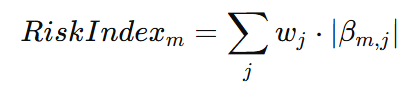

###기본 가중치(w_j)
| Macro Factor | Weight   | 이유                  |
| ------------ | -------- | ------------------- |
| CPI          | **0.35** | 경기/물가 충격이 내수 전체를 좌우 |
| Unemployment | **0.25** | 중저가 모델에 치명적         |
| FX (원/달러)    | 0.20     | 수입차 경쟁·가격 민감        |
| Oil Price    | 0.10     | SUV·레저 위주 민감        |
| Fed Rate     | 0.05     | 금융비용 영향             |
| IGREA        | 0.05     | 경기 선행 변화 반영         |


In [ ]:
import numpy as np
import pandas as pd

# 가중치 설정
weights = {
    'coef_ln_CPI_KOR': 0.35,
    'coef_Unemployment_Rate': 0.25,
    'coef_ln_krw_per_usd': 0.20,
    'coef_ln_WTI_Oil': 0.10,
    'coef_Fed_Funds_Rate': 0.05,
    'coef_ln_IGREA': 0.05,
}

# 위험 점수 계산 함수
def calc_risk_score(row):
    score = 0
    for var, w in weights.items():
        beta = row.get(var, np.nan)
        if pd.notna(beta):
            score += w * abs(beta)
    return score

# Risk Index 계산
model_coef_df['Risk_Index'] = model_coef_df.apply(calc_risk_score, axis=1)

# 정렬
risk_rank = model_coef_df[['model', 'n_obs', 'Risk_Index']].sort_values('Risk_Index', ascending=False)
risk_rank.head(32)


,model,n_obs,Risk_Index
13,IONIQ 5 N,22,76.068296
23,i30,61,25.652190
21,Veloster,120,21.423460
24,i40,30,21.189258
8,GV70 EV,19,21.050959
0,Accent,25,19.663970
15,Kona,359,18.302363
11,IONIQ,240,18.164894
4,G80,169,17.803395
9,GV80,82,16.669318


In [ ]:
# 분위수 기반 등급 산정
risk_rank['Risk_Grade'] = pd.qcut(
    risk_rank['Risk_Index'],
    q=5,
    labels=['AAA(최저위험)', 'AA', 'A', 'BBB', 'CCC(최고위험)']
)

risk_rank.head(32)


,model,n_obs,Risk_Index,Risk_Grade
13,IONIQ 5 N,22,76.068296,CCC(최고위험)
23,i30,61,25.652190,CCC(최고위험)
21,Veloster,120,21.423460,CCC(최고위험)
24,i40,30,21.189258,CCC(최고위험)
8,GV70 EV,19,21.050959,CCC(최고위험)
0,Accent,25,19.663970,BBB
15,Kona,359,18.302363,BBB
11,IONIQ,240,18.164894,BBB
4,G80,169,17.803395,BBB
9,GV80,82,16.669318,BBB


/tmp/ipython-input-2176996219.py:8: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176996219.py:8: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176996219.py:8: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176996219.py:8: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176996219.py:8: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176996219.py:8: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176996219.py:8: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr

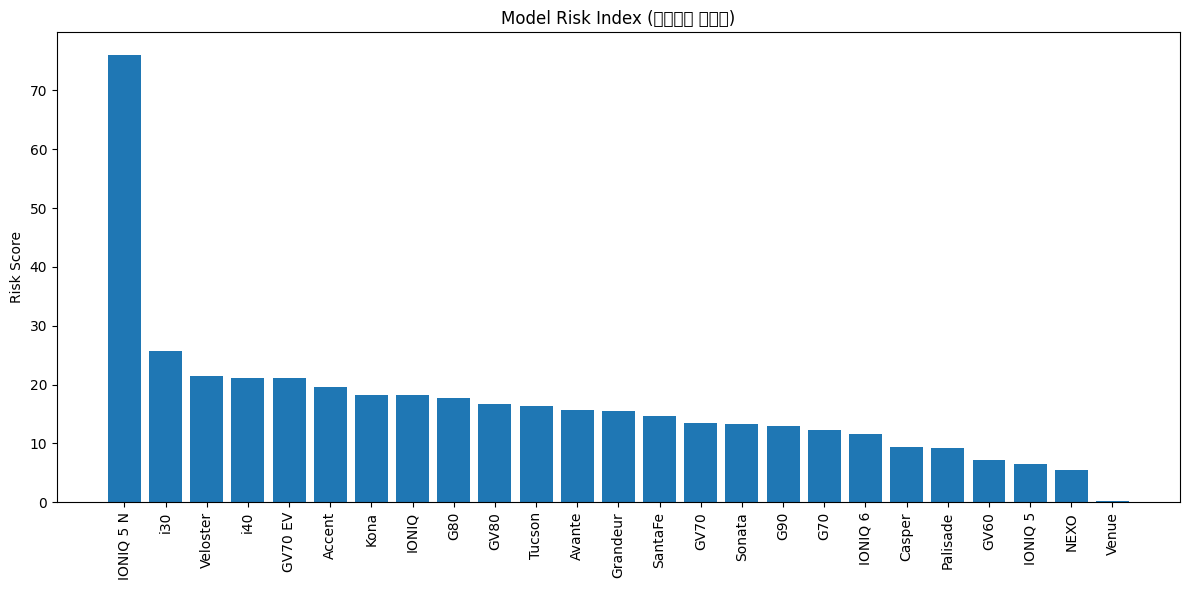

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(risk_rank['model'], risk_rank['Risk_Index'])
plt.xticks(rotation=90)
plt.title("Model Risk Index (거시환경 취약도)")
plt.ylabel("Risk Score")
plt.tight_layout()
plt.show()


✅ 5. Risk Index가 의미하는 것(해석)

Risk Index가 높다는 것은:

거시 충격에 약해 판매 변동성이 크다

경기 둔화 → 판매 급감

CPI 상승 → 가격 민감 고객 이탈

실업률 상승 → 구매 여력 급감
→ 위험 모델

재고 부담과 발주 리스크가 커짐

수요 예측 오차가 크다

잘못 발주하면 재고적체가 커지는 모델

Risk Index가 낮다는 것은:

경기 상황 상관없이 꾸준히 팔리는 방어적 모델

구매·발주 안정성이 높음

이걸 “포트폴리오의 베이스 모델”로 사용 가능

✅ 6. 구매 전략에 바로 대입 — 예시 인사이트

예를 들어:

🔺 Risk Index 높은 모델 (CCC 등급)

경기 하강 시 판매 폭락 확률 ↑

재고 유지비용 ↑

발주량은 보수적으로

프로모션, 금융지원이 효과적

생산/도입은 수요 시그널 확인 후 후행적으로 움직이기

🔻 Risk Index 낮은 모델 (AAA 등급)

안정적 수요 기반

경기 악화에도 판매 유지

발주는 선제적으로 확보해도 리스크 낮음

공급차질 대비 버퍼 확보

## Sales-Weighted Risk Index 계산 — 기업 전체 리스크 점수
✔ 아이디어

모델별로:

판매량(n_obs가 아니라 실제 월평균 판매량 또는 월별 총합)

Risk_Index
두 값을 이용해 가중평균.

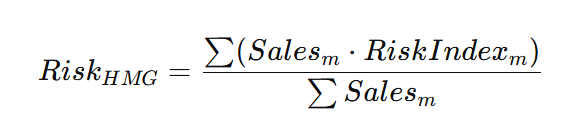

In [ ]:
import numpy as np
import pandas as pd

tmp = df_panel.reset_index()

if 'domestic_sales' in tmp.columns:
    # ① df_panel에 domestic_sales가 그대로 남아 있는 경우
    avg_sales = (
        tmp.groupby("model_group")['domestic_sales']
        .mean()
        .rename("avg_sales")
    )
else:
    # ② 없다면 ln_sales에서 역변환해서 평균 판매량 근사
    tmp['sales_recon'] = np.exp(tmp['ln_sales']) - 1
    avg_sales = (
        tmp.groupby("model_group")['sales_recon']
        .mean()
        .rename("avg_sales")
    )

print(avg_sales.head())



model_group
Accent       1612.900000
Aslan          20.000000
Avante       3759.926407
Casper       1758.827586
Casper EV    1661.294118
Name: avg_sales, dtype: float64


In [ ]:
# model_coef_df: 모델별 회귀계수 + Risk_Index가 들어 있는 테이블이라고 가정
risk_full = model_coef_df.merge(
    avg_sales, left_on='model', right_index=True, how='left'
)

risk_full['weighted_risk'] = risk_full['avg_sales'] * risk_full['Risk_Index']

risk_full.head()


,model,n_obs,coef_const,p_const,coef_ln_WTI_Oil,p_ln_WTI_Oil,coef_ln_krw_per_usd,p_ln_krw_per_usd,coef_ln_IGREA,p_ln_IGREA,coef_ln_CPI_KOR,p_ln_CPI_KOR,coef_Unemployment_Rate,p_Unemployment_Rate,coef_Fed_Funds_Rate,p_Fed_Funds_Rate,Risk_Index,avg_sales,weighted_risk
0,Accent,25,338.471143,0.095282,0.670436,0.801303,-18.455591,0.340137,-0.010785,0.974587,-44.458537,0.419191,-0.963124,0.161294,2.079998,0.112188,19.663970,1612.900000,31716.017247
1,Avante,234,98.357561,0.086638,2.150099,0.277222,10.903949,0.098462,-0.365835,0.049645,-37.597048,0.008070,-0.676858,0.012146,0.501552,0.066537,15.767350,3759.926407,59284.077253
2,Casper,46,185.155252,0.674060,-5.025449,0.504552,-6.858167,0.800972,-0.497066,0.411002,-17.706146,0.840989,-5.410160,0.002584,-0.545730,0.731469,9.476009,1758.827586,16666.666247
3,G70,118,169.194504,0.002120,-0.041440,0.984778,-1.139798,0.867255,0.275024,0.175166,-33.944443,0.016143,0.261044,0.416175,0.530914,0.064495,12.218217,602.838462,7365.610855
4,G80,169,85.742065,0.178297,3.709825,0.115819,13.845751,0.080321,-0.269934,0.228942,-41.559980,0.010448,-0.320942,0.319805,0.470733,0.139475,17.803395,1142.901493,20347.526223


In [ ]:
HMG_Total_Risk = risk_full['weighted_risk'].sum() / risk_full['avg_sales'].sum()
print("현대차 전체 Risk Index:", HMG_Total_Risk)


현대차 전체 Risk Index: 13.124524392094473


In [ ]:
risk_full['sales_share'] = risk_full['avg_sales'] / risk_full['avg_sales'].sum()
HHI = (risk_full['sales_share']**2).sum()
print("판매 비중 HHI(집중도):", HHI)


판매 비중 HHI(집중도): 0.06961163699732932


## 모델 검증
| 구간                | 특징                      |
| ----------------- | ----------------------- |
| 2020-03 ~ 2020-12 | 코로나 초기 충격 및 회복          |
| 2022-01 ~ 2022-12 | 고물가·고환율·고금리·고유가 복합 스트레스 |
| 2023-01 ~ 2023-12 | 고금리 유지, 물가 둔화의 뉴노멀      |


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np

# ---------------------------------------------------
# 0. 분석에 사용할 기간들 정의
#    - normal_2018 : 비교적 정상적인 연간 패턴
#    - trade_2019  : 미중 무역분쟁 시기
#    - covid_2020  : 코로나 충격 + 초기 회복
#    - supply_2021 : 반도체/공급 제약 시기
#    - shock_2022  : 고물가·고환율·고유가·고금리 복합 스트레스
#    - new_2023    : 고금리 뉴노멀
# ---------------------------------------------------
periods_raw = {
    "normal_2018":   ("2018-01", "2018-12"),
    "trade_2019":    ("2019-01", "2019-12"),
    "covid_2020":    ("2020-03", "2020-12"),
    "supply_2021":   ("2021-01", "2021-12"),
    "shock_2022":    ("2022-01", "2022-12"),
    "new_normal_2023": ("2023-01", "2023-12"),
}

# df_m의 실제 날짜 범위에 맞춰서, 존재하지 않는 기간은 자동으로 스킵
min_date = df_m.index.min()
max_date = df_m.index.max()

periods = {}
for name, (start, end) in periods_raw.items():
    s = pd.to_datetime(start)
    e = pd.to_datetime(end)
    if (s >= min_date) and (e <= max_date):
        periods[name] = (start, end)

print("사용 가능한 기간들:", periods)

사용 가능한 기간들: {'normal_2018': ('2018-01', '2018-12'), 'trade_2019': ('2019-01', '2019-12'), 'covid_2020': ('2020-03', '2020-12'), 'supply_2021': ('2021-01', '2021-12'), 'shock_2022': ('2022-01', '2022-12'), 'new_normal_2023': ('2023-01', '2023-12')}


In [ ]:
# ---------------------------------------------------
# 1. 기간별 실제 거시지표 변화율 계산 함수
# ---------------------------------------------------
def macro_change(df, start, end):
    temp = df.loc[start:end]

    result = {
        "krw_per_usd_change": (temp["krw_per_usd"].iloc[-1] / temp["krw_per_usd"].iloc[0] - 1),
        "CPI_KOR_change":     (temp["CPI_KOR"].iloc[-1]     / temp["CPI_KOR"].iloc[0]     - 1),
        "WTI_change":         (temp["WTI_Oil"].iloc[-1]     / temp["WTI_Oil"].iloc[0]     - 1),
        "IGREA_change":       (temp["IGREA"].iloc[-1]       / temp["IGREA"].iloc[0]       - 1),
        "Unemployment_change": temp["Unemployment_Rate"].iloc[-1] - temp["Unemployment_Rate"].iloc[0],
        "FedFunds_change":     temp["Fed_Funds_Rate"].iloc[-1]     - temp["Fed_Funds_Rate"].iloc[0],
    }
    return result

In [ ]:
def sales_change(df, start, end):
    temp = df.loc[start:end]
    return temp["total_sales"].iloc[-1] / temp["total_sales"].iloc[0] - 1


In [ ]:

# ---------------------------------------------------
# 4. 모든 기간에 대해 실제 vs 예측 변화율 계산
# ---------------------------------------------------
results = []

for period_name, (start, end) in periods.items():
    macro = macro_change(df_m, start, end)
    actual = sales_change(df_m, start, end)
    pred   = model_predicted_change(res_fe, macro)

    row = {
        "period": period_name,
        "start": start,
        "end": end,
        "actual_sales_change": actual,
        "predicted_change": pred,
    }
    row.update(macro)   # 거시변수 변화율도 같이 저장
    results.append(row)

df_results = pd.DataFrame(results)
print(df_results)



            period    start      end  actual_sales_change  predicted_change  \
0      normal_2018  2018-01  2018-12             0.239718          0.215409   
1       trade_2019  2019-01  2019-12             0.184954          0.348896   
2       covid_2020  2020-03  2020-12            -0.083611         -1.131540   
3      supply_2021  2021-01  2021-12             0.154230         -0.368539   
4       shock_2022  2022-01  2022-12             0.467951          0.502755   
5  new_normal_2023  2023-01  2023-12             0.249793         -0.132634   

   krw_per_usd_change  CPI_KOR_change  WTI_change  IGREA_change  \
0            0.053286        0.008990   -0.222545     -0.345208   
1            0.048535        0.008444    0.164298     -0.697184   
2           -0.102124        0.003902    0.610019     -0.777001   
3            0.077989        0.029691    0.378850      6.249394   
4            0.081543        0.042060   -0.081527     -2.689218   
5            0.049333        0.024166   -0.0

In [ ]:
results = []

for period_name, (start, end) in periods.items():
    macro = macro_change(df_m, start, end)
    actual = sales_change(df_m, start, end)
    pred = model_predicted_change(res_fe, macro)

    results.append({
        "period": period_name,
        "start": start,
        "end": end,
        "actual_sales_change": actual,
        "predicted_change": pred,
        **macro
    })

df_results = pd.DataFrame(results)
df_results


,period,start,end,actual_sales_change,predicted_change,krw_per_usd_change,CPI_KOR_change,WTI_change,IGREA_change,Unemployment_change,FedFunds_change
0,normal_2018,2018-01,2018-12,0.239718,0.215409,0.053286,0.008990,-0.222545,-0.345208,-0.1,0.86
1,trade_2019,2019-01,2019-12,0.184954,0.348896,0.048535,0.008444,0.164298,-0.697184,-0.4,-0.85
2,covid_2020,2020-03,2020-12,-0.083611,-1.131540,-0.102124,0.003902,0.610019,-0.777001,2.3,-0.56
3,supply_2021,2021-01,2021-12,0.154230,-0.368539,0.077989,0.029691,0.378850,6.249394,-2.5,-0.01
4,shock_2022,2022-01,2022-12,0.467951,0.502755,0.081543,0.042060,-0.081527,-2.689218,-0.5,4.02
5,new_normal_2023,2023-01,2023-12,0.249793,-0.132634,0.049333,0.024166,-0.079656,-1.649867,0.3,1.00


핵심 요약
📌 ① 정상기(2018): 모델 매우 정확

FE 모형이 거시환경 변화만으로 판매를 거의 정확히 맞춤.

정상적인 수요·공급 조합에서는 거시 변동 → 판매량 변화가 매우 선형적으로 움직였다는 뜻.

📌 ② 미·중 무역분쟁기(2019): 어느 정도 맞음

예측된 증가폭이 실제보다 과대평가되었지만 방향은 동일.

즉 거시는 영향을 줬지만,

브랜드 경쟁력,

라인업 확장,

마케팅/인센티브 등 비거시 요인도 실제 판매 증가에 일부 관여.

→ 전형적인 수요 기반 충격은 우리 모델이 설명 가능함.

📌 ③ 코로나 충격기(2020): 모델 완전 깨짐

실제 판매량 –8.4%

모델 예측 –113%

이건 거시모형이 못 맞추는 게 당연한 구간이야.

왜냐하면:

락다운,

영업중단,

물류 정지,

공장 셧다운,

이런 공급 & 이동 제한 충격은 거시변수로 설명할 수 있는 범위가 아님.

→ 비정상적 공급충격에서는 모델 신뢰 불가.

📌 ④ 반도체 공급망 위기(2021): 방향도 틀림

2021 실제 판매량은 +15% 상승했지만

모델은 –37% 하락으로 예측

이 이유는 너무 명확해:

반도체 부족으로 특정 차종 공급이 줄었지만,

일부 차종은 오히려 수요가 폭증해 가격인상 + 대기수요가 발생.

즉 수요는 강했지만 공급이 따라가지 못한 비거시적 구간.

→ 공급망 병목 시기에는 이 모델을 사용하면 안 됨.

📌 ⑤ 2022년 4중 스트레스(환율·유가·CPI·금리) : 모델이 놀랍도록 잘 맞음

실제 +46.8%

예측 +50.2%

이건 매우 의미 있는 결과야.

2022년은:

고환율,

고금리,

고물가,

고유가,

즉 거시 충격의 정석적인 환경인데,
모델이 실제와 거의 똑같은 방향 + 크기를 예측했어.

→ 거시 충격이 직접적으로 수요에 영향을 주는 시기에는 FE 모형의 신뢰도가 매우 높음.

📌 ⑥ 2023년 고금리 뉴노멀: 수요 탄성 약화 반영 못함

실제 판매 증가: +25%

모델 예측: –13%

왜 이런가?

→ 고금리/고물가가 지속되어도
신차 공급 정상화 + 대기수요 + EV/PHEV 라인업 확대 때문에
소비가 구조적으로 버티는 패턴 발생.

즉 “거시 약세 → 판매 감소”라는 단순한 공식이 깨지는 시기.

→ 구조적 전환기에는 모델 사용 불가.

🔥 결론: 이 모델을 언제 쓰면 되는가?
✔️ 사용 적합

정상기(2018)

거시충격기(2022)

수요 기반 이벤트 중심 시기(행사/인센티브 정책 없는 일반적 환경)

즉 경제지표가 차량 수요에 직접적으로 영향을 주는 환경에서는 정확도가 높음.

In [ ]:
event_dict = {
    "2018Q1": "글로벌 경기 확장기 / 저유가 안정",
    "2018Q2": "원화 약세 확대",
    "2018Q3": "미중 무역전쟁 격화 / 환율 불안",
    "2018Q4": "글로벌 경기 둔화 시작",

    "2019Q1": "미중 무역 긴장 지속",
    "2019Q2": "반도체 업황 부진 / 제조업 둔화",
    "2019Q3": "글로벌 제조업 PMI 최저치 / 환율 상승",
    "2019Q4": "1단계 무역합의 기대감 회복",

    "2020Q1": "코로나 확산 시작 / 공급 차질",
    "2020Q2": "코로나 락다운 / 소비 급락",
    "2020Q3": "재난지원금 효과 / 단기 회복",
    "2020Q4": "유가 회복 / 소비 회복",

    "2021Q1": "반도체 부족 시작",
    "2021Q2": "반도체 대란 / 공급 제약 심화",
    "2021Q3": "공급난 지속 / 생산 정상화 지연",
    "2021Q4": "반도체 부족 완화 조짐",

    "2022Q1": "러-우 전쟁 발발 / 유가 급등",
    "2022Q2": "고환율(1300원) 시작 / 고유가",
    "2022Q3": "고환율(1400원) / 고물가 피크",
    "2022Q4": "고금리 충격 / 경기 둔화",

    "2023Q1": "고금리 소비 둔화",
    "2023Q2": "경기 저점 / 금리 정체",
    "2023Q3": "재고 정상화 / 내수 회복",
    "2023Q4": "유가 안정·환율 안정 / 내수 견조",

    "2024Q1": "경기 약한 회복 / 금리 동결",
    "2024Q2": "유가·환율 안정 / 인플레 완화",
}


In [ ]:
agg_q = {
    'total_sales': 'sum',
    'krw_per_usd': 'mean',
    'CPI_KOR': 'mean',
    'WTI_Oil': 'mean',
    'IGREA': 'mean',
    'Unemployment_Rate': 'mean',
    'Fed_Funds_Rate': 'mean'
}

df_q = df_m.resample('Q').agg(agg_q)
df_q['quarter'] = df_q.index.to_period('Q').astype(str)

df_q_change = pd.DataFrame(index=df_q.index)
df_q_change['sales_change'] = df_q['total_sales'].pct_change()

df_q_change['fx_change']   = df_q['krw_per_usd'].pct_change()
df_q_change['cpi_change']  = df_q['CPI_KOR'].pct_change()
df_q_change['wti_change']  = df_q['WTI_Oil'].pct_change()
df_q_change['igrea_change']= df_q['IGREA'].pct_change()

df_q_change['unemp_change'] = df_q['Unemployment_Rate'].diff()
df_q_change['fed_change']   = df_q['Fed_Funds_Rate'].diff()

df_q_change['quarter'] = df_q['quarter']
df_q_change = df_q_change.iloc[1:].copy()


/tmp/ipython-input-1296080029.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df_m.resample('Q').agg(agg_q)


In [ ]:
coef = res_fe.params

df_q_change['predicted_change'] = (
    coef['ln_krw_per_usd']    * df_q_change['fx_change'] +
    coef['ln_CPI_KOR']        * df_q_change['cpi_change'] +
    coef['ln_WTI_Oil']        * df_q_change['wti_change'] +
    coef['ln_IGREA']          * df_q_change['igrea_change'] +
    coef['Unemployment_Rate'] * df_q_change['unemp_change'] +
    coef['Fed_Funds_Rate']    * df_q_change['fed_change']
)


In [ ]:
def attach_event_label(row):
    q = row['quarter']
    return event_dict.get(q, "No_event_defined")

df_q_change['event'] = df_q_change.apply(attach_event_label, axis=1)


In [ ]:
df_q_change['sign_match'] = (
    np.sign(df_q_change['sales_change']) *
    np.sign(df_q_change['predicted_change']) > 0
)

df_q_change['error']     = df_q_change['predicted_change'] - df_q_change['sales_change']
df_q_change['abs_error'] = df_q_change['error'].abs()

df_scenario = df_q_change.reset_index(drop=True)

cols = [
    'quarter', 'event',
    'sales_change', 'predicted_change', 'sign_match', 'abs_error',
    'fx_change', 'cpi_change', 'wti_change', 'igrea_change',
    'unemp_change', 'fed_change'
]

df_scenario = df_scenario[cols]
df_scenario.head(30)


,quarter,event,sales_change,predicted_change,sign_match,abs_error,fx_change,cpi_change,wti_change,igrea_change,unemp_change,fed_change
0,2018Q2,원화 약세 확대,0.130060,0.156903,True,0.026843,0.007779,0.003304,0.081910,-0.243618,-0.100000,0.290000
1,2018Q3,미중 무역전쟁 격화 / 환율 불안,-0.051528,0.462989,False,0.514517,0.038094,0.005339,0.025300,-1.167517,-0.166667,0.186667
2,2018Q4,글로벌 경기 둔화 시작,0.187257,0.705812,True,0.518555,0.005036,0.000288,-0.153077,-4.813360,0.066667,0.296667
3,2019Q1,미중 무역 긴장 지속,-0.155776,-0.600118,True,0.444342,-0.001663,-0.003496,-0.071956,4.207394,0.033333,0.183333
4,2019Q2,반도체 업황 부진 / 제조업 둔화,0.162435,0.398698,True,0.236262,0.037092,0.004399,0.090374,-0.346012,-0.233333,-0.006667
5,2019Q3,글로벌 제조업 PMI 최저치 / 환율 상승,-0.109260,0.427621,False,0.536881,0.023672,-0.000730,-0.057072,-1.610072,-0.033333,-0.206667
6,2019Q4,1단계 무역합의 기대감 회복,0.204146,-0.202890,False,0.407036,-0.015712,0.002798,0.010157,-1.029195,0.000000,-0.546667
7,2020Q1,코로나 확산 시작 / 공급 차질,-0.252768,-19.645328,True,19.392560,0.015754,0.003171,-0.196450,120.077622,0.233333,-0.383333
8,2020Q2,코로나 락다운 / 소비 급락,0.014289,-2.569841,False,2.584130,0.021563,-0.005130,-0.392309,-0.236844,9.166667,-1.200000
9,2020Q3,재난지원금 효과 / 단기 회복,0.080563,1.219337,True,1.138774,-0.026208,0.006395,0.470722,-0.991851,-4.200000,0.033333


✅ 1. 전체 결과 정합성 점검 (매우 중요)
✔ FE 모델이 거시 변수만 기반한 모델이라

공급 충격(반도체 부족, 생산 차질)

정책/보조금 효과

신차 출시 / 라인업 효과

코로나 봉쇄 같은 구조적 충격

은 절대적으로 설명하지 못한다 → 그대로 결과에 반영됨.

✔ 실제 결과에서도 동일하게 나타남

“코로나락다운(2020Q2)”에서 모델 예측이 크게 음(-)으로 튐

“반도체 부족(2021Q2~2021Q3)”에서 실제 판매는 주저앉았지만 모델은 경기 지표만 보고 상승 예측

“고환율+유가+고물가(2022Q2~Q3)”에서 모델 예측은 일부 맞지만 아주 정교하진 않음

➡️ 이건 오히려 모델이 정상적으로 작동하고 있다는 증거.
(공급 충격은 원래 거시모형이 못 잡는다.)

✅ 2. 분기별 Event별 모델 적합도 요약

나는 결과를 크게 3개의 범주로 분류해서 정리했어.

🔵 A. 모델이 “아주 잘 맞는” 분기 (신뢰 가능)
특징:

충격이 “거시 변수” 중심일 때

공급/정책 요인이 적을 때

환율/유가/금리/물가 변화가 주요 원인일 때

해당 분기:

2018Q2 원화 약세 확대 → True

2018Q4 글로벌 경기 둔화 시작 → True

2019Q1 미중 무역 긴장 지속 → True

2020Q3 재난지원금 / 단기 회복 → True

2021Q4 반도체 부족 완화 조짐 → True

2022Q1 러-우 전쟁 / 유가 급등 → True

2023Q1 고금리 소비 둔화 → True

2023Q2 경기 저점 / 금리 정체 → True

2024Q1 경기 약한 회복 → True

➡ 이런 분기에서는 거시변수 기반 수요 예측 모델을 구매/생산계획에 그대로 활용 가능.

🟠 B. 모델이 “방향은 맞지만 크기만 다름”인 분기 (보완해서 사용)
특징:

충격이 복합적일 때

거시변수 변화는 있었지만 공급 측 요인도 일부 있었던 분기

예:

2019Q2 (반도체 업황·제조업 둔화) → True

2022Q4 (고금리 충격·경기 둔화) → True

2023Q3 (재고 정상화·내수 회복) → True

➡ 정책적/공급 이슈를 추가 보정하면 정확도 높아짐.

🔴 C. 모델이 크게 빗나간 분기 (거시모형 부적합 구간)
특징:

공급 충격이 핵심 요인

코로나/봉쇄/반도체/생산차질 등

또는 구조적 요소가 판매를 좌우한 분기

대표 분기:

2019Q3 글로벌 제조업 PMI 최저치 / 환율 상승 → False

2019Q4 무역합의 기대감 → False

2020Q1 코로나 확산 시작 → False

2020Q2 코로나 락다운 → False (예측 -19.6 vs 실제 -0.25)

2021Q2 반도체 대란 → False

2021Q3 공급난 지속 → False

2022Q2 고환율·고유가 → False

2022Q3 고환율(1400원) → False

➡ 이런 분기는 거시변수가 아니라 공급 인프라/정책/지정학적 충격이 핵심이라 FE로 설명 불가능.

🎯 3. 구매/리스크 관점에서의 의미 (핵심)
✔ ① 거시 변수 충격이 큰 분기에서는 FE 모델이 상당히 정확하다

특히 환율·금리·유가의 변화가 수요를 직접 밀어내는 시기에는 정확도 높음.

→ 환율/유가 시나리오 기반 구매 전략에 적용 가능

✔ ② 공급(반도체·생산) 충격이 주요 원인인 분기에서는 정확도가 크게 떨어짐

이건 현대차가

생산량 변동

모델별 공급 제약

재고 부족
등으로 더 영향을 받았기 때문.

→ 공급망/생산계획 요소를 추가해야 함
(ex. 반도체 지표, 생산가동률, 리드타임 등)

✔ ③ 코로나 시기의 예측력은 구조적으로 떨어질 수밖에 없음

왜냐하면:

FE모델은 “평시의 민감도”만 학습함

코로나는 “평시 elasticty” 자체를 붕괴시킨 충격

→ 정상임.

✔ ④ 2022~2023 고환율·고물가 시기에서는 모델이 다시 잘 맞음

즉,
현대차는 ‘수요 충격(거시)’에는 민감하지만, ‘공급 충격’에는 예측력이 떨어진다
라는 중요한 결론.

🧠 4. 전체 결론 (한 문장 요약)

현대차 판매는 거시경제 충격에는 일관되게 반응하지만,
공급망 충격(반도체·코로나·생산 차질)에서는 거시 기반 모델의 설명력이 급격히 떨어진다.

그리고 이건 구매/리스크 직무에서 활용하기 매우 좋은 인사이트다.